In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score


In [40]:
import pandas as pd

df = pd.read_csv('Dataset/pp-2025.csv', encoding='ISO-8859-1')  # or 'windows-1252'
# removal of whitespaces in the column names
df.columns = df.columns.str.strip()
df.head(5)

,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,Locality,Town/City,District,County,Transaction Type,Status
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000,01 January 2025,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,NaN,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A
1,{2D4D7609-0E15-BDF9-E063-4804A8C0672F},465000,01 January 2025,DA1 3NQ,S,N,F,117,NaN,WENTWORTH DRIVE,NaN,DARTFORD,DARTFORD,KENT,A,A
2,{36A61A95-481C-DEF2-E063-4704A8C046AE},160000,01 January 2025,SK5 6PT,T,N,L,28,NaN,HOBSON STREET,NaN,STOCKPORT,STOCKPORT,GREATER MANCHESTER,B,A
3,{2F7F2B43-D937-E08F-E063-4804A8C05A49},300000,01 January 2025,B30 2PE,O,N,F,45,NaN,HAZELWELL ROAD,NaN,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,A
4,{31C68072-9735-FEE3-E063-4804A8C04F37},335000,01 January 2025,RH6 9UL,T,N,F,5,NaN,MAIZE CROFT,NaN,HORLEY,REIGATE AND BANSTEAD,SURREY,A,A


__Number of missing rows values__

In [41]:
print('Number of rows:',len(df.index))
print('Number of columns',len(df.columns))


Number of rows: 203849
Number of columns 16


In [42]:
print(df.isnull().sum())

Transaction ID            0
Price                     0
Date of Transfer          0
Postcode                173
Property Type             0
Old/New                   0
Duration                  0
Primary address           0
Secondary Address    180441
Street Name            2637
Locality             127672
Town/City                 0
District                  0
County                    0
Transaction Type          0
Status                    0
dtype: int64


Postcode has less number of missing values. Therefore, dropping the rows.

In [43]:
df.dropna(subset=['Postcode'],inplace=True)

Since the columns like Secondary Address, Street Name and Locality could be left as empty. As we have the important features like postcode, town/city, which gives the rich information regarding the location. 
Therefore, we will mark as N/A and Unknown.

In [44]:
df['Secondary Address'].fillna('N/A', inplace=True)
df['Street Name'].fillna('N/A', inplace=True)
df['Locality'].fillna('Unknown', inplace=True)

C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\4101782801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Secondary Address'].fillna('N/A', inplace=True)
C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\4101782801.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [45]:
print(df.isnull().sum())

Transaction ID       0
Price                0
Date of Transfer     0
Postcode             0
Property Type        0
Old/New              0
Duration             0
Primary address      0
Secondary Address    0
Street Name          0
Locality             0
Town/City            0
District             0
County               0
Transaction Type     0
Status               0
dtype: int64


__Visualisation of distribution__


In [46]:
print('Number of Unique Property Type: ',df['Property Type'].nunique())
df['Property Type'].unique()
# T = terraced, F = flat-maisonette, S = semi-detached, D = detached, O = other


Number of Unique Property Type:  5


array(['F', 'S', 'T', 'O', 'D'], dtype=object)

In [47]:
print(df.dtypes[["Property Type", "Price"]])

Property Type    object
Price             int64
dtype: object


In [48]:
print(df['Price'].describe())


count    2.036760e+05
mean     3.509992e+05
std      6.537988e+05
min      1.000000e+02
25%      1.880000e+05
50%      2.840000e+05
75%      4.200000e+05
max      1.095000e+08
Name: Price, dtype: float64


C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\1154746373.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(


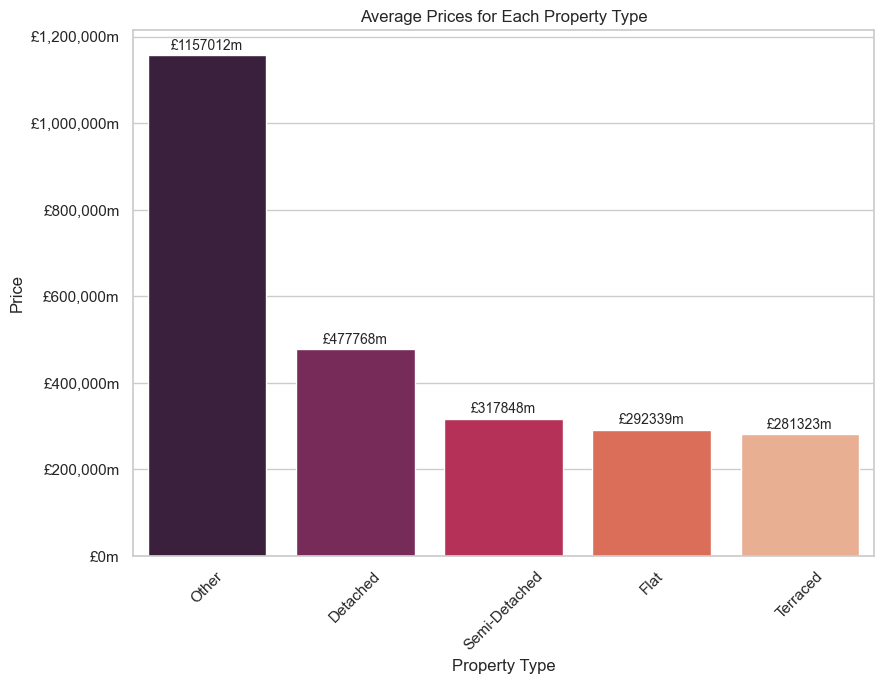

In [49]:

propertymap={'D': 'Detached', 'S': 'Semi-Detached', 'T': 'Terraced', 'F': 'Flat', 'O': 'Other'}

df['Full Property Type']=df['Property Type'].map(propertymap)


# sns.set_theme(style='dark',palette='deep')
plt.figure(figsize=(9,7))
sns.set_theme(style="whitegrid")

# visualisaton
ax=sns.barplot(
    data=df, x='Full Property Type', y='Price', estimator='mean', errorbar=None, 
    palette='rocket',
    # order by the mean price and sort in descending order
    order=df.groupby("Full Property Type")['Price'].mean().sort_values(ascending=False).index
)

# formatting y axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '£{:,.0f}'.format(x) + 'm'))



# labels on the bar
for labels in ax.containers:
    # ax.bar_label(labels,fmt='£%.0f',padding=2,fontsize=10)
    ax.bar_label(labels, fmt='£{:.0f}m'.format, padding=2, fontsize=10)

# labels

plt.title('Average Prices for Each Property Type')
plt.ylabel('Price')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Price over time


df['Date of Transfer'].describe()

In [50]:
df

,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,Locality,Town/City,District,County,Transaction Type,Status,Full Property Type
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000,01 January 2025,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Flat
1,{2D4D7609-0E15-BDF9-E063-4804A8C0672F},465000,01 January 2025,DA1 3NQ,S,N,F,117,N/A,WENTWORTH DRIVE,Unknown,DARTFORD,DARTFORD,KENT,A,A,Semi-Detached
2,{36A61A95-481C-DEF2-E063-4704A8C046AE},160000,01 January 2025,SK5 6PT,T,N,L,28,N/A,HOBSON STREET,Unknown,STOCKPORT,STOCKPORT,GREATER MANCHESTER,B,A,Terraced
3,{2F7F2B43-D937-E08F-E063-4804A8C05A49},300000,01 January 2025,B30 2PE,O,N,F,45,N/A,HAZELWELL ROAD,Unknown,BIRMINGHAM,BIRMINGHAM,WEST MIDLANDS,B,A,Other
4,{31C68072-9735-FEE3-E063-4804A8C04F37},335000,01 January 2025,RH6 9UL,T,N,F,5,N/A,MAIZE CROFT,Unknown,HORLEY,REIGATE AND BANSTEAD,SURREY,A,A,Terraced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203844,{36A61A94-8E3C-DEF2-E063-4704A8C046AE},345000,30 May 2025,BS37 5DX,D,N,F,99,N/A,WINDSOR DRIVE,YATE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,A,Detached
203845,{36A61A94-8A72-DEF2-E063-4704A8C046AE},295000,30 May 2025,SK8 1PW,T,N,F,24,N/A,CRESCENT ROAD,Unknown,CHEADLE,STOCKPORT,GREATER MANCHESTER,A,A,Terraced
203846,{36A61A94-77CD-DEF2-E063-4704A8C046AE},165000,30 May 2025,S40 4TE,D,N,F,16,N/A,GLADSTONE ROAD,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Detached
203847,{36A61A94-7EDD-DEF2-E063-4704A8C046AE},530000,30 May 2025,BN20 9EF,D,N,F,16,N/A,BUCKHURST CLOSE,Unknown,EASTBOURNE,EASTBOURNE,EAST SUSSEX,A,A,Detached


Visualisation

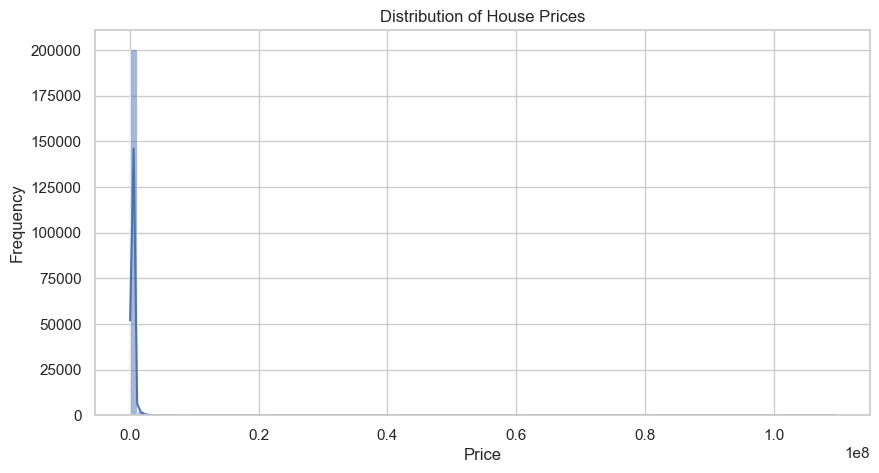

In [51]:
# distribution of hosue prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, bins=100)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


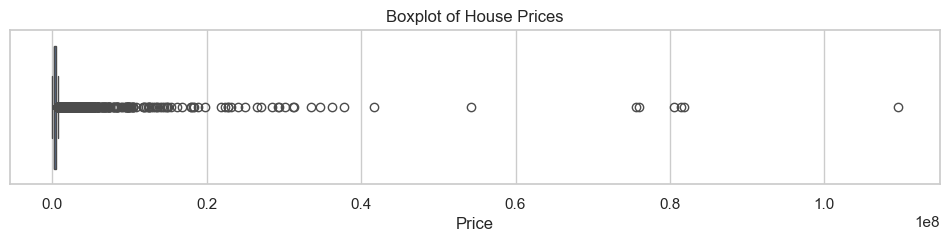

In [52]:
# outlier

plt.figure(figsize=(12, 2))
sns.boxplot(data=df, x='Price')
plt.title('Boxplot of House Prices')
plt.show()


In [53]:
# removing the high outliers
price_threshold = df['Price'].quantile(0.91)
df_filtered = df[df['Price'] < price_threshold]
print(f"Filtered dataset shape: {df_filtered.shape}")


Filtered dataset shape: (185130, 17)


<Axes: title={'center': 'Top 20 Postcode Areas'}, xlabel='Postcode Area'>

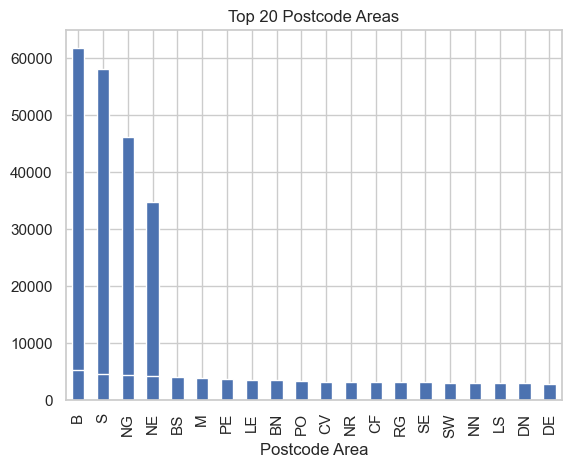

In [54]:
# Property type counts
df['Full Property Type'].value_counts().plot(kind='bar', title='Property Type Distribution')

# Postcode area counts
df['Postcode Area'] = df['Postcode'].str.extract(r'^([A-Z]{1,2})')
df['Postcode Area'].value_counts().head(20).plot(kind='bar', title='Top 20 Postcode Areas')


In [55]:
print('Number of rows:',len(df_filtered.index))
print('Number of columns',len(df_filtered.columns))

Number of rows: 185130
Number of columns 17


Dataframe comparison after removal of outlier

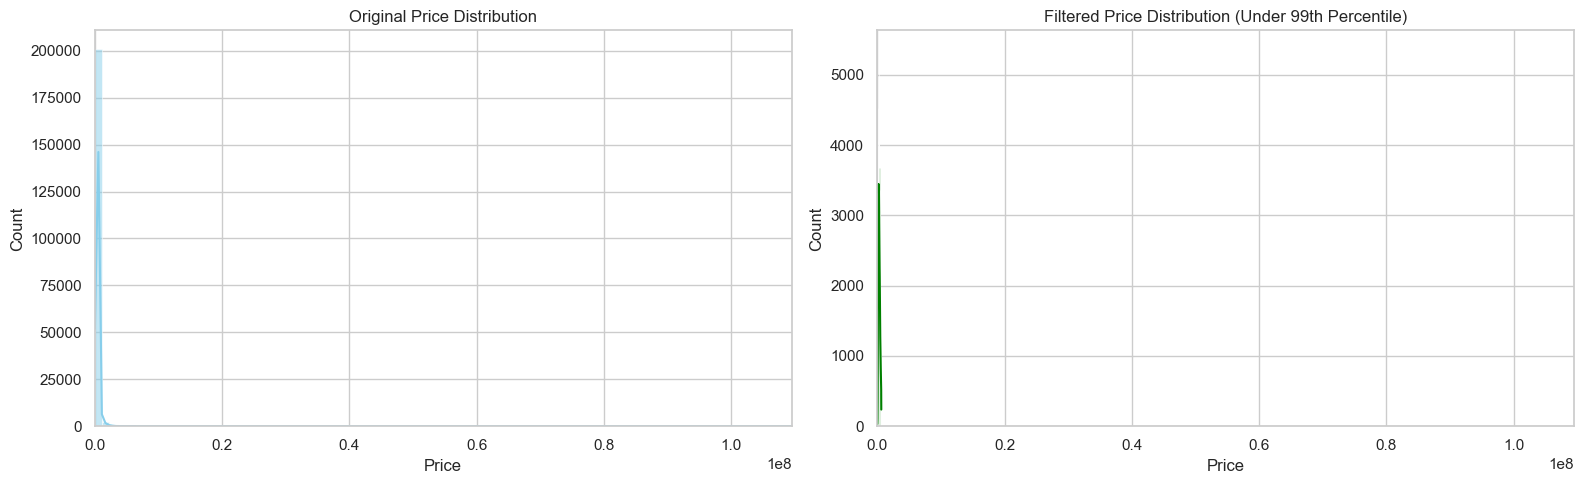

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# original dataframe
sns.histplot(df['Price'], bins=100, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Original Price Distribution")
axes[0].set_xlim(0, df['Price'].max())

# modified dataframe
sns.histplot(df_filtered['Price'], bins=100, kde=True, ax=axes[1], color='green')
axes[1].set_title("Filtered Price Distribution (Under 99th Percentile)")
axes[1].set_xlim(0, df['Price'].max())

plt.tight_layout()
plt.show()


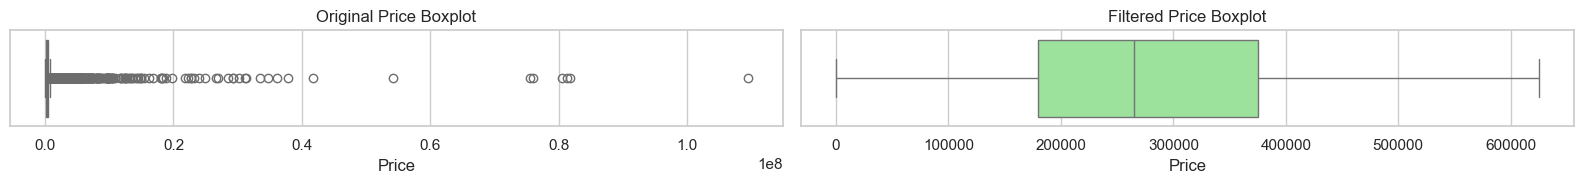

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(16, 2))

# original
sns.boxplot(x=df['Price'], ax=axes[0], color='salmon')
axes[0].set_title("Original Price Boxplot")

# modified
sns.boxplot(x=df_filtered['Price'], ax=axes[1], color='lightgreen')
axes[1].set_title("Filtered Price Boxplot")

plt.tight_layout()
plt.show()


In [58]:
print("Original Dataset")
print(df['Price'].describe())
print("\nFiltered Dataset")
print(df_filtered['Price'].describe())


Original Dataset
count    2.036760e+05
mean     3.509992e+05
std      6.537988e+05
min      1.000000e+02
25%      1.880000e+05
50%      2.840000e+05
75%      4.200000e+05
max      1.095000e+08
Name: Price, dtype: float64

Filtered Dataset
count    185130.000000
mean     283881.957678
std      133432.892330
min         100.000000
25%      180000.000000
50%      265000.000000
75%      375000.000000
max      624999.000000
Name: Price, dtype: float64


_Distribution of the target column_

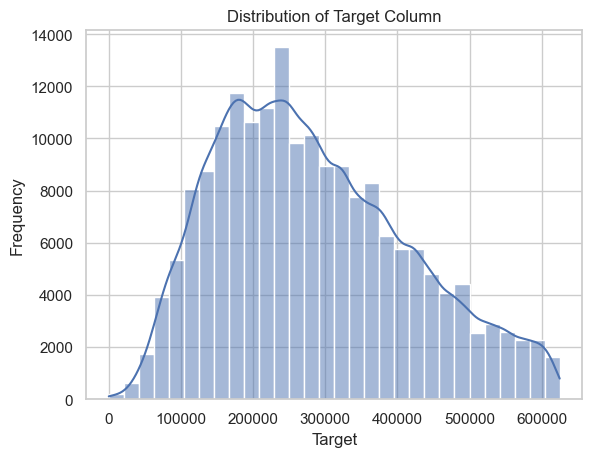

In [59]:
sns.histplot(df_filtered['Price'], bins=30, kde=True)
plt.title('Distribution of Target Column')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

Results: We will not be considering columns like Secondary Address, Street Name, Locality for model training, as we have already have postcode column.             

__Feature engineering and modeling__

In [60]:
df_filtered['Postcode Area'] = df_filtered['Postcode'].str.extract(r'^([A-Z]{1,2})')


C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\3750236899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Postcode Area'] = df_filtered['Postcode'].str.extract(r'^([A-Z]{1,2})')


In [61]:
# extracting month and year
df_filtered['Date of Transfer'] = pd.to_datetime(df_filtered['Date of Transfer'])

df_filtered['Year'] = df_filtered['Date of Transfer'].dt.year
df_filtered['Month'] = df_filtered['Date of Transfer'].dt.month

C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\4157141495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date of Transfer'] = pd.to_datetime(df_filtered['Date of Transfer'])
C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\4157141495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Date of Transfer'].dt.year
C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\4157141495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [62]:
# # column with high cardinality
# df_filtered['Postcode Area'].unique()

In [63]:
df_filtered.head(3)

,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,Locality,Town/City,District,County,Transaction Type,Status,Full Property Type,Postcode Area,Year,Month
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000,2025-01-01,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,Unknown,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Flat,S,2025,1
1,{2D4D7609-0E15-BDF9-E063-4804A8C0672F},465000,2025-01-01,DA1 3NQ,S,N,F,117,N/A,WENTWORTH DRIVE,Unknown,DARTFORD,DARTFORD,KENT,A,A,Semi-Detached,DA,2025,1
2,{36A61A95-481C-DEF2-E063-4704A8C046AE},160000,2025-01-01,SK5 6PT,T,N,L,28,N/A,HOBSON STREET,Unknown,STOCKPORT,STOCKPORT,GREATER MANCHESTER,B,A,Terraced,SK,2025,1


In [64]:
print(df_filtered['District'].unique())
df_filtered.nunique()

['CHESTERFIELD' 'DARTFORD' 'STOCKPORT' 'BIRMINGHAM' 'REIGATE AND BANSTEAD'
 'COVENTRY' 'WOLVERHAMPTON' 'WAVERLEY' 'MANCHESTER' 'BRIGHTON AND HOVE'
 'EALING' 'NORTH EAST DERBYSHIRE' 'HAVERING' 'COUNTY DURHAM'
 'SOUTH HOLLAND' 'SOUTH KESTEVEN' 'ISLINGTON' 'CORNWALL' 'HACKNEY'
 'CHESHIRE EAST' 'CAMBRIDGE' 'CITY OF BRISTOL' 'WEST BERKSHIRE'
 'WYRE FOREST' 'BUCKINGHAMSHIRE' 'SALFORD' 'WEST NORTHAMPTONSHIRE'
 'RICHMOND UPON THAMES' 'DORSET' 'SOUTH DERBYSHIRE'
 'BOURNEMOUTH, CHRISTCHURCH AND POOLE' 'TEIGNBRIDGE' 'TUNBRIDGE WELLS'
 'SOUTH RIBBLE' 'OADBY AND WIGSTON' 'LEICESTER' 'BOLTON'
 'CITY OF KINGSTON UPON HULL' 'MEDWAY' 'PRESTON' 'WEST LINDSEY' 'BOSTON'
 'KNOWSLEY' 'FYLDE' 'MAIDSTONE' 'SWALE' 'NORTH EAST LINCOLNSHIRE' 'LUTON'
 'STAFFORD' 'GWYNEDD' 'RHONDDA CYNON TAFF' 'CARDIFF' 'ADUR'
 'MONMOUTHSHIRE' 'CHELMSFORD' 'NEWCASTLE UPON TYNE' 'SANDWELL' 'SWINDON'
 'LAMBETH' 'WESTMORLAND AND FURNESS' 'GUILDFORD' 'ARUN' 'DONCASTER'
 'THREE RIVERS' 'NORTH SOMERSET' 'SOMERSET' 'EAST SUFFOLK' 'NEWPOR

Transaction ID        185130
Price                   5898
Date of Transfer         148
Postcode              157731
Property Type              5
Old/New                    2
Duration                   2
Primary address        18979
Secondary Address       1713
Street Name            79672
Locality                9574
Town/City               1136
District                 318
County                   113
Transaction Type           2
Status                     1
Full Property Type         5
Postcode Area            105
Year                       1
Month                      5
dtype: int64

__Encoding__

In [65]:
# frequency encoding
df_filtered['PostcodeArea_Freq'] = df_filtered['Postcode Area'].map(df_filtered['Postcode Area'].value_counts())

df_filtered['Town/City_Freq']=df_filtered['Town/City'].map(df_filtered['Town/City'].value_counts())


# one hot encoding on categorical features
# this can be done before train and test split
# target encoding is done after train test split
features = ['Full Property Type', 'PostcodeArea_Freq', 'Old/New', 'Duration', 'Year', 'Month','Transaction Type','Town/City_Freq']

dfmodel=df_filtered[features+['Price'].copy()]

# print(dfmodel)
# one hot encoding, does not include price column
dfencode=pd.get_dummies(
    dfmodel,
    columns=['Full Property Type', 'Old/New', 'Duration', 'Transaction Type'],
    drop_first=True
    )



C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\1035786134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PostcodeArea_Freq'] = df_filtered['Postcode Area'].map(df_filtered['Postcode Area'].value_counts())
C:\Users\sanja\AppData\Local\Temp\ipykernel_3196\1035786134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Town/City_Freq']=df_filtered['Town/City'].map(df_filtered['Town/City'].value_counts())


In [66]:
dfencode

,PostcodeArea_Freq,Year,Month,Town/City_Freq,Price,Full Property Type_Flat,Full Property Type_Other,Full Property Type_Semi-Detached,Full Property Type_Terraced,Old/New_Y,Duration_L,Transaction Type_B
0,4378,2025,1,676,100000,True,False,False,False,False,True,False
1,1437,2025,1,303,465000,False,False,True,False,False,False,False
2,2358,2025,1,973,160000,False,False,False,True,False,True,True
3,4980,2025,1,2663,300000,False,True,False,False,False,False,True
4,1780,2025,1,133,335000,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
203844,3708,2025,5,3004,345000,False,False,False,False,False,False,False
203845,2358,2025,5,225,295000,False,False,False,True,False,False,False
203846,4378,2025,5,676,165000,False,False,False,False,False,False,False
203847,2939,2025,5,472,530000,False,False,False,False,False,False,False


In [67]:
print(df_filtered['Postcode Area'].unique())
print(dfmodel['PostcodeArea_Freq'].unique())
print(df_filtered['Town/City'].unique())
print(dfmodel['Town/City_Freq'].unique())

['S' 'DA' 'SK' 'B' 'RH' 'CV' 'WV' 'GU' 'M' 'BN' 'W' 'DE' 'RM' 'SR' 'PE'
 'NG' 'EC' 'PL' 'N' 'CW' 'CB' 'BS' 'RG' 'DY' 'SL' 'NN' 'TW' 'DT' 'BH' 'EX'
 'TN' 'PR' 'LE' 'BL' 'HU' 'ME' 'LN' 'L' 'FY' 'DN' 'LU' 'DL' 'ST' 'LL' 'CF'
 'NP' 'CM' 'NE' 'SN' 'SW' 'LA' 'SE' 'PO' 'WD' 'BA' 'IP' 'SS' 'TS' 'WF'
 'CR' 'UB' 'E' 'MK' 'LS' 'SA' 'WS' 'TQ' 'CH' 'LD' 'BB' 'OL' 'CA' 'IG' 'SO'
 'NR' 'WA' 'YO' 'HG' 'OX' 'NW' 'CT' 'HP' 'HA' 'TR' 'SG' 'SP' 'SM' 'BR'
 'CO' 'WN' 'HR' 'WR' 'SY' 'BD' 'HX' 'GL' 'TA' 'HD' 'KT' 'TF' 'AL' 'DH'
 'EN' 'TD' 'WC']
[4378 1437 2358 4980 1780 3016  990 2119 3718 2939  661 2789 1505  815
 3571 4223   46 2246 1258 1443 1279 3708 2656 1200  904 2843 1063  951
 2143 2195 2357 2147 3305 1234 1681 2344 1159 2616 1179 2891 1035 1553
 2314 1637 3118 1396 2298 4088 1852 1657 1357 2337 3098  656 1715 2236
 1864 2440 1749 1017  619 1943 1879 2826 2284 1360 1109  144 1902 1446
 1359  582 2161 3072 2099 2380  510 2034  668 1940 1541  685 1186 1462
  870  544  777 1775 1048  633 1073 1136 2079  

In [68]:
print(dfmodel['Month'].unique())
print(dfmodel['Full Property Type'].unique())
# print(dfmodel['PostcodeArea_Freq'].unique())
print(dfmodel['Old/New'].unique())
print(dfmodel['Duration'].unique())
print(dfmodel['Transaction Type'].unique())



[1 2 3 4 5]
['Flat' 'Semi-Detached' 'Terraced' 'Other' 'Detached']
['N' 'Y']
['L' 'F']
['A' 'B']


__Train Test Split__

In [69]:
from sklearn.model_selection import train_test_split

X=dfencode.drop(['Price','Year'],axis=1)

y=dfencode['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (129591, 10)
X_test shape: (55539, 10)
y_train shape: (129591,)
y_test shape: (55539,)


In [70]:
print(dfencode['Price'].describe().apply(lambda x: '{:.2f}'.format(x)))
df_filtered.nsmallest(100, 'Price')

count    185130.00
mean     283881.96
std      133432.89
min         100.00
25%      180000.00
50%      265000.00
75%      375000.00
max      624999.00
Name: Price, dtype: object


,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,...,District,County,Transaction Type,Status,Full Property Type,Postcode Area,Year,Month,PostcodeArea_Freq,Town/City_Freq
56857,{31C68072-E44A-FEE3-E063-4804A8C04F37},100,2025-02-12,CB22 3FT,O,N,F,THE WORKS,SUITE 5,WEST STREET,...,SOUTH CAMBRIDGESHIRE,CAMBRIDGESHIRE,B,A,Other,CB,2025,2,1279,691
170156,{34222873-3A9A-4D2B-E063-4704A8C07853},100,2025-04-02,CT6 5AQ,O,N,L,149,N/A,HIGH STREET,...,CANTERBURY,KENT,B,A,Other,CT,2025,4,1940,166
188781,{36A61A95-4B06-DEF2-E063-4704A8C046AE},200,2025-04-30,SO16 3DF,O,N,F,107,N/A,ETHELBURT AVENUE,...,SOUTHAMPTON,SOUTHAMPTON,B,A,Other,SO,2025,4,2161,1466
96059,{31C68072-F9DD-FEE3-E063-4804A8C04F37},230,2025-03-06,SK2 6EY,O,N,L,38,N/A,KENNERLEY ROAD,...,STOCKPORT,GREATER MANCHESTER,B,A,Other,SK,2025,3,2358,973
136292,{36A61A95-46B0-DEF2-E063-4704A8C046AE},450,2025-03-26,SS0 7JN,O,N,F,35,N/A,BURDETT AVENUE,...,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,B,A,Other,SS,2025,3,1864,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181765,{36A61A95-52FB-DEF2-E063-4704A8C046AE},8000,2025-04-22,B37 7PA,O,N,F,189,N/A,WHITEBEAM ROAD,...,SOLIHULL,WEST MIDLANDS,B,A,Other,B,2025,4,4980,2663
167654,{34222873-29B1-4D2B-E063-4704A8C07853},8200,2025-03-31,OL8 4NP,O,N,F,68,N/A,MEDWAY ROAD,...,OLDHAM,GREATER MANCHESTER,B,A,Other,OL,2025,3,1446,589
73279,{31C68072-E5DA-FEE3-E063-4804A8C04F37},8262,2025-02-21,CW11 3AN,O,N,F,5,N/A,SHERGOLD CLOSE,...,CHESHIRE EAST,CHESHIRE EAST,B,A,Other,CW,2025,2,1443,132
43662,{36A61A95-4E4D-DEF2-E063-4704A8C046AE},9000,2025-02-03,BB1 9QY,O,N,F,BADEN COURT,1,BROWNHILL ROAD,...,BLACKBURN WITH DARWEN,BLACKBURN WITH DARWEN,B,A,Other,BB,2025,2,1902,446


In [71]:
print(X_train.columns.tolist())


['PostcodeArea_Freq', 'Month', 'Town/City_Freq', 'Full Property Type_Flat', 'Full Property Type_Other', 'Full Property Type_Semi-Detached', 'Full Property Type_Terraced', 'Old/New_Y', 'Duration_L', 'Transaction Type_B']


__Model Buidling__

In [72]:
from sklearn.ensemble import RandomForestRegressor


modelrf=RandomForestRegressor(n_estimators=100,random_state=32)

# hyperparameter tuning
paramgrid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 3, 4]
}

gridsearchRF=GridSearchCV(
    estimator=modelrf, param_grid=paramgrid,
    cv=5,scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=2
    )

gridsearchRF.fit(X_train, y_train)

bestparam=gridsearchRF.best_estimator_
print('Best Estimator: ',bestparam)

# 33 minutes


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Estimator:  RandomForestRegressor(min_samples_leaf=4, n_estimators=300, random_state=32)


__Model Evaluation (Train Data)__

In [ ]:
y_train_pred = bestparam.predict(X_train)  # ✅ only use training data


mae_train = mean_absolute_error(y_train, y_train_pred)

rmsetrain = np.sqrt(mean_squared_error(y_test, y_train_pred))
r2train = r2_score(y_test, y_train_pred)

print(f"MAE: £{mae_train:,.0f}")
print(f"RMSE: £{rmsetrain:,.0f}")
print(f"R² Score: {r2train:.3f}")

ValueError: Found input variables with inconsistent numbers of samples: [55539, 129591]

In [78]:
X_train

,PostcodeArea_Freq,Month,Town/City_Freq,Full Property Type_Flat,Full Property Type_Other,Full Property Type_Semi-Detached,Full Property Type_Terraced,Old/New_Y,Duration_L,Transaction Type_B
58212,4378,2,275,False,False,True,False,False,False,False
36002,1359,1,452,False,False,False,True,False,False,False
83769,633,2,76,False,False,True,False,False,False,False
60958,2442,2,98,False,False,False,True,False,False,False
116448,1446,3,66,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
132164,4223,3,34,False,False,False,False,False,False,False
114394,2337,3,8598,False,False,False,True,False,False,False
145658,2789,3,358,True,False,False,False,False,True,False
162068,2147,3,1121,False,False,False,True,False,False,False


__Model Evaluation (Test Data)__

In [76]:

# Evaluate
y_pred = bestparam.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: £{mae:,.0f}")
print(f"RMSE: £{rmse:,.0f}")
print(f"R² Score: {r2:.3f}")

MAE: £61,212
RMSE: £82,018
R² Score: 0.625


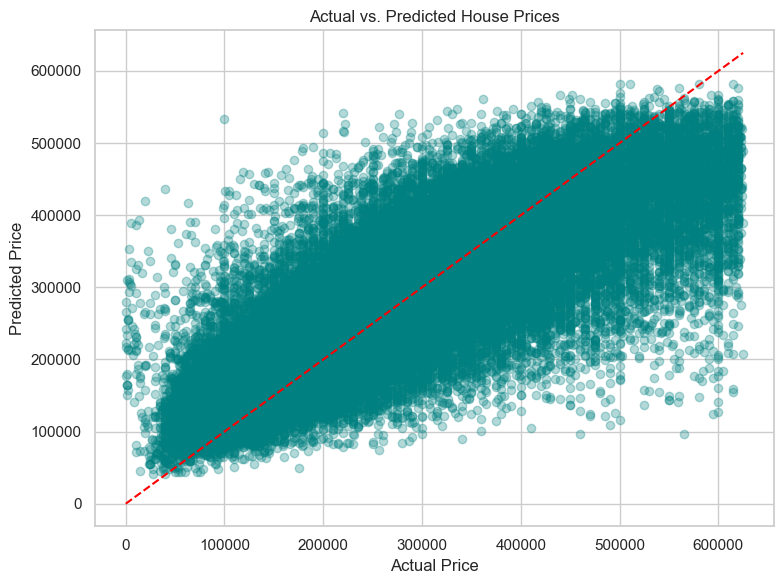

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
dfencode.nunique().sort_values(ascending=False)


Price                               7112
PostcodeArea_Freq                    103
Month                                  5
Full Property Type_Terraced            2
Full Property Type_Flat                2
Full Property Type_Other               2
Full Property Type_Semi-Detached       2
Duration_L                             2
Old/New_Y                              2
Transaction Type_B                     2
Year                                   1
dtype: int64

__XGBoost model__

In [ ]:
from xgboost import XGBRegressor

xgboostmodel=XGBRegressor(
    n_estimator=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgboostmodel.fit(X_train,y_train)

f:\Project\HM Land Registry\myvenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Model Evaluation

In [ ]:
ypred=xgboostmodel.predict(X_test)

mae = mean_absolute_error(y_test, ypred)
rmse = np.sqrt(mean_squared_error(y_test, ypred))
r2 = r2_score(y_test, ypred)

print(f"XGBoost MAE: £{mae:,.0f}")
print(f"XGBoost RMSE: £{rmse:,.0f}")
print(f"XGBoost R²: {r2:.3f}")

XGBoost MAE: £92,183
XGBoost RMSE: £132,310
XGBoost R²: 0.532


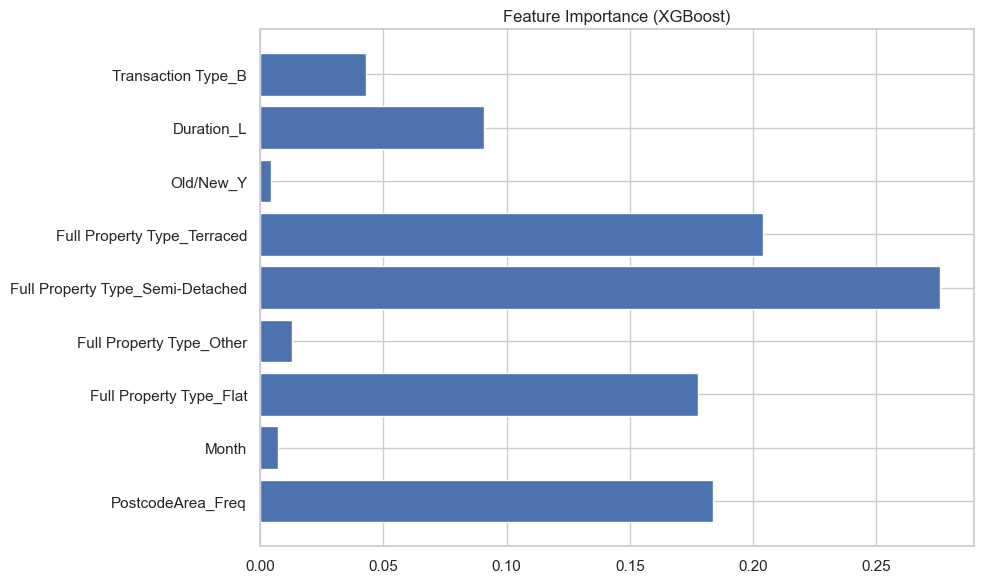

In [ ]:
import matplotlib.pyplot as plt

importances = xgboostmodel.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()


Model Building XGBoost

In [ ]:
from xgboost import XGBRegressor
# hyper parameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)
bestparam = grid.best_estimator_
print("Best params:", bestparam)

ypred=bestparam.predict(X_test)

mae = mean_absolute_error(y_test, ypred)
rmse = np.sqrt(mean_squared_error(y_test, ypred))
r2 = r2_score(y_test, ypred)

print(f"XGBoost MAE: £{mae:,.0f}")
print(f"XGBoost RMSE: £{rmse:,.0f}")
print(f"XGBoost R²: {r2:.3f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best params: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)
XGBoost MAE: £89,217
XGBoost RMSE: £129,228
XGBoost R²: 0.553


_Evalutaion Visualisation_

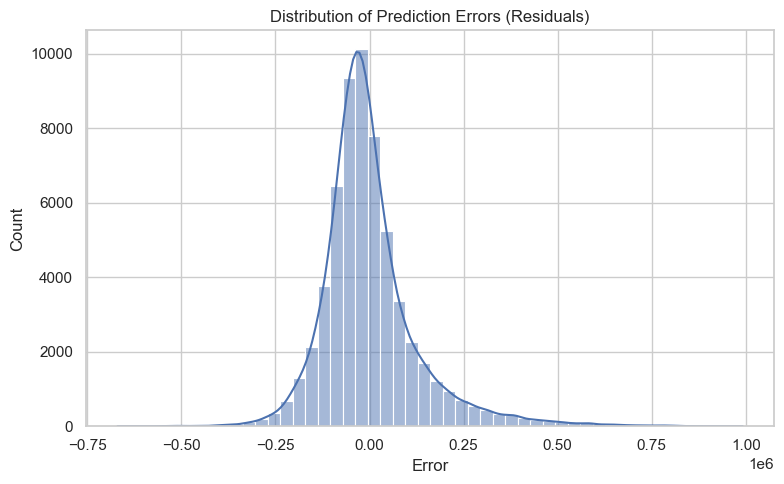

In [ ]:
residuals = y_test - ypred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()


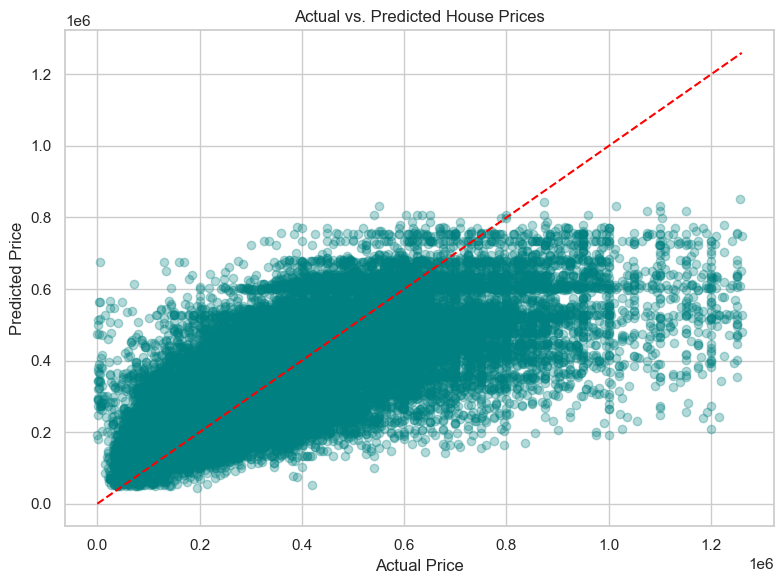

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

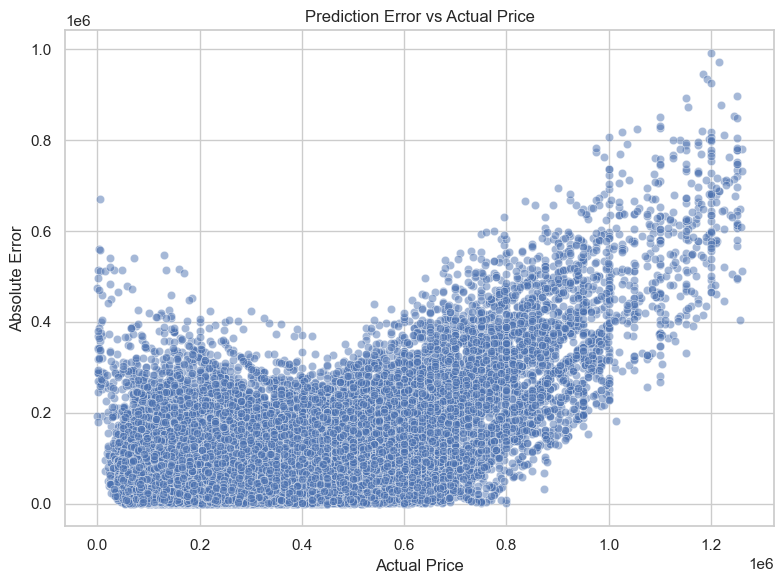

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=abs(residuals), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Absolute Error")
plt.title("Prediction Error vs Actual Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
df_filtered.head(2)

,Transaction ID,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary address,Secondary Address,Street Name,...,Town/City,District,County,Transaction Type,Status,Full Property Type,Postcode Area,Year,Month,PostcodeArea_Freq
0,{2D4D7608-D868-BDF9-E063-4804A8C0672F},100000,2025-01-01,S41 7GG,F,N,L,BRINDLEY HOUSE,FLAT 23,TAPTON LOCK HILL,...,CHESTERFIELD,CHESTERFIELD,DERBYSHIRE,A,A,Flat,S,2025,1,4449
1,{2D4D7609-0E15-BDF9-E063-4804A8C0672F},465000,2025-01-01,DA1 3NQ,S,N,F,117,N/A,WENTWORTH DRIVE,...,DARTFORD,DARTFORD,KENT,A,A,Semi-Detached,DA,2025,1,1574


In [89]:
df_filtered['County'].nunique()

113

In [82]:
dfencode.head(2)

,PostcodeArea_Freq,Year,Month,Price,Full Property Type_Flat,Full Property Type_Other,Full Property Type_Semi-Detached,Full Property Type_Terraced,Old/New_Y,Duration_L,Transaction Type_B
0,4449,2025,1,100000,True,False,False,False,False,True,False
1,1574,2025,1,465000,False,False,True,False,False,False,False
